In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skmap.overlay import SpaceOverlay, SpaceTimeOverlay
from skmap.misc import find_files, GoogleSheet, ttprint
import warnings
import matplotlib

version = '20250404'

folder_path = '/home/xuemeng/work_xuemeng/soc/SoilHealthDataCube'
df = pd.read_parquet(f'{folder_path}/data/003_data_overlaid.organized.pq')
print(df.shape)

mtdf = pd.read_parquet('/home/xuemeng/work_xuemeng/ai4sh_data.harmo/data_v2/soil_meta.cleaned_l2.pq')
mtdf = mtdf[['time', 'lat', 'lon', 'id','hzn_dep','soc_method']]
mtdf = mtdf.drop_duplicates(subset=['time', 'lat', 'lon', 'id', 'hzn_dep'])
df = df.merge(mtdf, on=['time', 'lat', 'lon', 'id', 'hzn_dep'], how='left')
print(df.shape)
# from shapely.geometry import Point
# from geopandas import gpd 
# geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

# gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
# gdf = gdf.to_crs("EPSG:3035")
# gdf.to_file(f'{folder}/data/000_data_ocd.3035.gpkg',driver='GPKG')  # for QGIS

(45616, 594)
(45616, 595)


In [41]:
df.loc[df['lc_survey'].isna(),'soc_method'].unique()

array(['Walkley-Black, OM in fine soil (< 2 mm) is divided by 1.72 (the Waksman coefficient)',
       'Springer & Klee. Wet combustion'], dtype=object)

# Temporal distribution

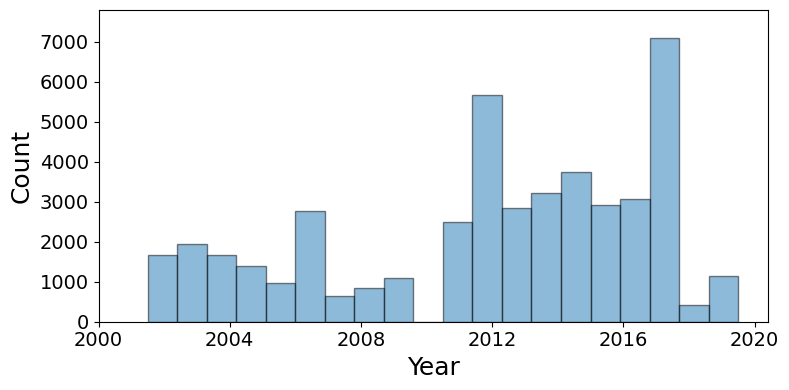

In [3]:
import matplotlib.pyplot as plt

# Create the figure and axis for the histogram
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the histogram
hist_data = ax1.hist(df['time'], bins=20, alpha=0.5, edgecolor='black', orientation='vertical')

# Customize the histogram
x_ticks = [2000, 2004, 2008, 2012, 2016, 2020]
x_tick_positions = [tick + 0.5 for tick in x_ticks]  # Offset by 0.5
ax1.set_xticks(x_tick_positions)
ax1.set_xticklabels(x_ticks, fontsize=16)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylim(0, max(hist_data[0]) * 1.1)
# ax1.text(0.02, 0.95, 'B', transform=ax1.transAxes, fontsize=20, va='top', ha='left')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(f'{folder_path}/figure/plot_histogram_year.svg', format='svg')

# Show the histogram
plt.show()


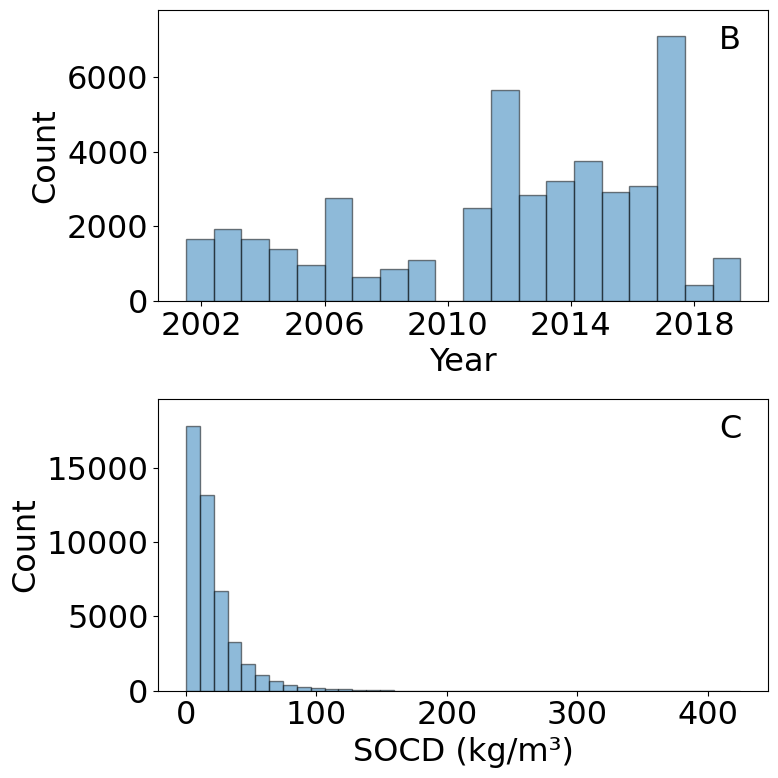

In [18]:
import matplotlib.pyplot as plt

# Create the figure and axes for the two-panel histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=False)

# Top panel: Histogram for df['time']
hist_data_time = ax1.hist(df['time'], bins=20, alpha=0.5, edgecolor='black', orientation='vertical')

# Customize the top histogram
x_ticks_time = [2002, 2006, 2010, 2014, 2018]
x_tick_positions_time = [tick + 0.5 for tick in x_ticks_time]  # Offset by 0.5
ax1.set_xticks(x_tick_positions_time)
ax1.set_xticklabels(x_ticks_time, fontsize=23)
ax1.set_xlabel('Year', fontsize=23)
ax1.set_ylabel('Count', fontsize=23)
ax1.tick_params(axis='both', which='major', labelsize=23)
ax1.set_ylim(0, max(hist_data_time[0]) * 1.1)
# ax1.set_title('Top Panel: Histogram of Time', fontsize=20)

# Add 'B' text to the top figure
ax1.text(0.92, 0.95, 'B', transform=ax1.transAxes, fontsize=23, va='top', ha='left')

# Bottom panel: Histogram for df['ocd']
hist_data_ocd = ax2.hist(df['ocd'], bins=40, alpha=0.5, edgecolor='black', orientation='vertical')

# Customize the bottom histogram
ax2.set_xlabel('SOCD (kg/m³)', fontsize=23)
ax2.set_ylabel('Count', fontsize=23)
ax2.tick_params(axis='both', which='major', labelsize=23)
ax2.set_ylim(0, max(hist_data_ocd[0]) * 1.1)
# ax2.set_title('Bottom Panel: Histogram of OCD', fontsize=20)

# Add 'C' text to the bottom figure
ax2.text(0.92, 0.95, 'C', transform=ax2.transAxes, fontsize=23, va='top', ha='left')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(f'{folder_path}/figure/plot_histogram.year.svg', format='svg')

# Show the histograms
plt.show()


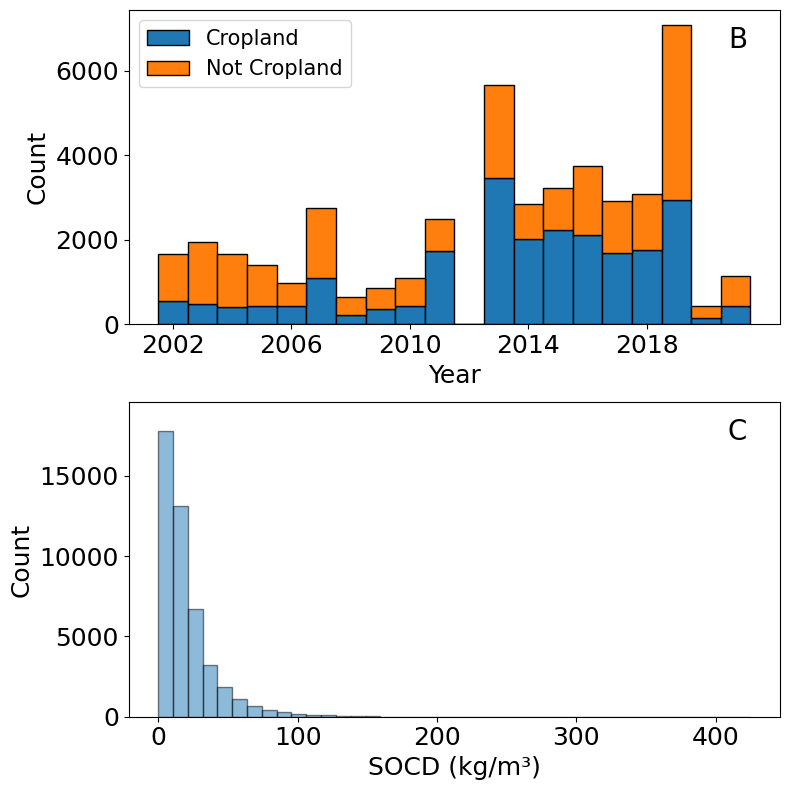

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume 'df' is already defined with appropriate columns

df['is_cropland'] = df['lc_survey'].apply(lambda x: 'Cropland' if x == 'cropland' else 'Not Cropland')

# Bin the 'time' column
bins = 20
df['time_bin'] = pd.cut(df['time'], bins=bins)
bin_counts = df.groupby(['time_bin', 'is_cropland']).size().unstack(fill_value=0)

# Extract data for the stacked bar plot
cropland_counts = bin_counts.get('Cropland', np.zeros(len(bin_counts)))
not_cropland_counts = bin_counts.get('Not Cropland', np.zeros(len(bin_counts)))

# Compute bar positions based on bins
bin_edges = np.linspace(df['time'].min(), df['time'].max(), bins + 1)
bar_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Center of bins
bar_width = np.diff(bin_edges)[0]  # Uniform bar width

# Create the figure and axes for the two-panel plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=False)

# Top panel: Stacked bar plot for 'is_cropland'
ax1.bar(bar_centers, cropland_counts, width=bar_width, label='Cropland', align='center', edgecolor='black')
ax1.bar(bar_centers, not_cropland_counts, width=bar_width, bottom=cropland_counts, label='Not Cropland', align='center', edgecolor='black')

# Customize the top panel
ax1.set_xticks(bar_centers[[0, 4, 8, 12, 16]])
ax1.set_xticklabels([2002, 2006, 2010, 2014, 2018], fontsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.legend(fontsize=15)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)

# Bottom panel: Histogram for df['ocd']
hist_data_ocd = ax2.hist(df['ocd'], bins=40, alpha=0.5, edgecolor='black', orientation='vertical')

# Customize the bottom panel
ax2.set_xlabel('SOCD (kg/m³)', fontsize=18)
ax2.set_ylabel('Count', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylim(0, max(hist_data_ocd[0]) * 1.1)

# Add labels to the plots
ax1.text(0.92, 0.95, 'B', transform=ax1.transAxes, fontsize=20, va='top', ha='left')
ax2.text(0.92, 0.95, 'C', transform=ax2.transAxes, fontsize=20, va='top', ha='left')

# Adjust layout and show
plt.tight_layout()
plt.savefig(f'{folder_path}/figure/plot_histogram.year.svg', format='svg')
plt.show()




In [30]:
unique_combinations = df[['lon', 'lat']].drop_duplicates().shape[0]
print(f"Number of unique (lon, lat) combinations: {unique_combinations}")


Number of unique (lon, lat) combinations: 30762


In [4]:
# df['log_hzn_dep'] = np.log1p(df['hzn_dep'])
# df['log_ocd'] = np.log1p(df['ocd'])


# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.gridspec import GridSpec

# # Create a GridSpec layout for precise positioning
# fig = plt.figure(figsize=(10, 10))  # Adjust width for the colorbar
# gs = GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[1, 1])  # Reserve space for the colorbar in the second column

# # Top plot: Histogram
# ax1 = fig.add_subplot(gs[0, 0])
# hist_data = ax1.hist(df['time'], bins=20, alpha=0.5, edgecolor='black', orientation='vertical')

# # Customize the first plot (Histogram)
# x_ticks = [2000, 2004, 2008, 2012, 2016, 2020]
# x_tick_positions = [tick + 0.5 for tick in x_ticks]  # Offset by 0.5
# ax1.set_xticks(x_tick_positions)
# ax1.set_xticklabels(x_ticks, fontsize=20)
# ax1.set_xlabel('Year', fontsize=20)
# ax1.set_ylabel('Count', fontsize=20)
# ax1.tick_params(axis='both', which='major', labelsize=20)
# ax1.set_ylim(0, max(hist_data[0]) * 1.1)
# ax1.text(0.02, 0.95, 'B', transform=ax1.transAxes, fontsize=22, va='top', ha='left')

# # Bottom plot: Hexbin
# ax2 = fig.add_subplot(gs[1, 0])
# hb2 = ax2.hexbin(df['log_hzn_dep'], df['log_ocd'], gridsize=15,
#                  extent=[np.log1p(2), np.log1p(200), 0, np.log1p(500)],
#                  bins='log', cmap='cividis_r', mincnt=1)

# # Customize the second plot (Hexbin)
# ax2.set_xlabel('Soil depth (cm)', fontsize=20)
# ax2.set_ylabel('SOCD (g/cm³)', fontsize=20)
# ax2.tick_params(axis='both', which='major', labelsize=20)

# # Set ticks to the original scale for the hexbin plot
# x_ticks = [2, 5, 10, 20, 50, 100, 200]
# y_ticks = [0, 10, 100, 500]
# ax2.set_xticks(np.log1p(x_ticks))
# ax2.set_xticklabels([f'{tick:.0f}' for tick in x_ticks], fontsize=20)
# ax2.set_yticks(np.log1p(y_ticks))
# ax2.set_yticklabels([f'{tick:.0f}' for tick in y_ticks], fontsize=20)
# ax2.text(0.02, 0.95, 'C', transform=ax2.transAxes, fontsize=22, va='top', ha='left')

# # Color bar: Placed on the side of the hexbin plot
# cbar_ax = fig.add_subplot(gs[1, 1])
# cbar = fig.colorbar(hb2, cax=cbar_ax, orientation='vertical')
# cbar.set_label('Counts', fontsize=20)
# cbar.ax.tick_params(labelsize=20)

# # Adjust layout to avoid overlap
# plt.tight_layout()
# plt.savefig(f'{folder}/figure/plot_data.availbility_depth.year.svg', format='svg')

# # Show the combined figure
# plt.show()

In [10]:
grp = df.groupby(['ref','soc_method']).size().reset_index(name='count') #, 'time'
grp

,ref,soc_method,count
0,LUCAS,"ISO 10694:1995, Dry combustion (elementary ana...",5806
1,ParcelasCOS,"Walkley-Black, OM in fine soil (< 2 mm) is div...",1576
2,ParcelasINES,"Walkley-Black, OM in fine soil (< 2 mm) is div...",20656
3,infosolo,Dry combustion,252
4,infosolo,Springer & Klee. Wet combustion,106
5,infosolo,Walkley-Black,266
6,thuenen.bze.lw,Organic carbon [g kg-1] (DIN ISO 10694:1995),16234


In [11]:
grp = df.groupby(['ref']).size().reset_index(name='count') #, 'time'
grp

,ref,count
0,GLanCE,720
1,LUCAS,5806
2,ParcelasCOS,1576
3,ParcelasINES,20656
4,infosolo,624
5,thuenen.bze.lw,16234


# Strata by LC and depth

In [3]:
df = df.loc[df['ref']!='GLanCE']
grouped_stats = df.groupby(['lc_survey', pd.cut(df['hzn_dep'], bins=[0, 20, 50, 100, 200])])['ocd'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()

grouped_stats.loc[grouped_stats['lc_survey'] == 'bare land & lichens/moss','lc_survey'] = 'bare land &\nlichens/moss'
grouped_stats.loc[grouped_stats['lc_survey'] == 'water areas & wetland','lc_survey'] = 'water areas\n& wetland'

/tmp/ipykernel_31795/3954010263.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.02, 1, 1])  # Adjust layout to make space for color bar


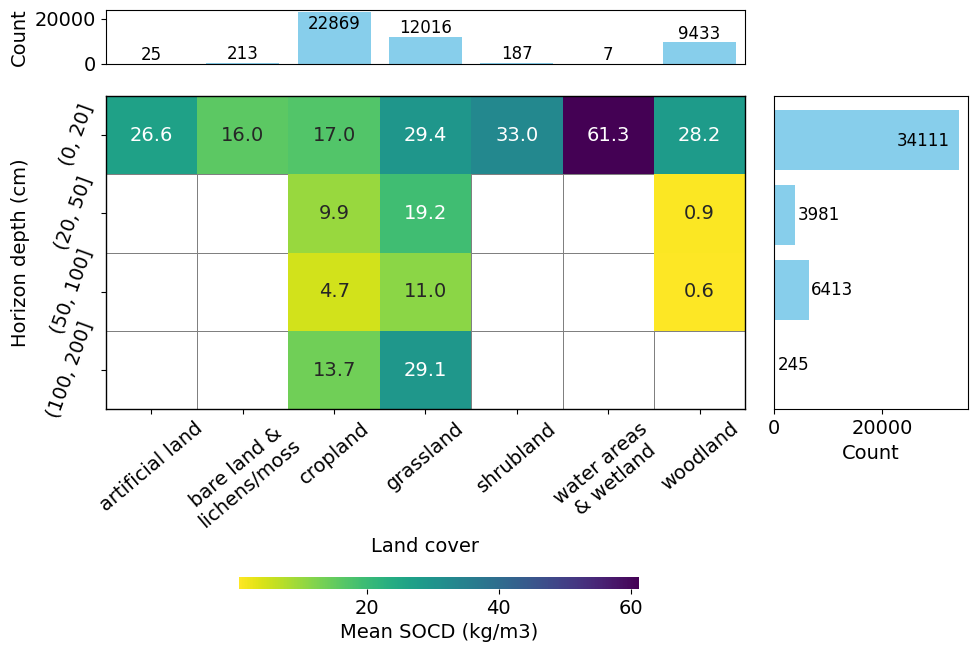

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the table for heatmap
heatmap_data = grouped_stats.pivot_table(index='hzn_dep', columns='lc_survey', values='mean')
count_data = grouped_stats.groupby('lc_survey')['count'].sum()
hzn_dep_count = grouped_stats.groupby('hzn_dep')['count'].sum()

# Reverse the order of hzn_dep_count
hzn_dep_count = hzn_dep_count.iloc[::-1]

# Plotting
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(10, 6))

# Bar plot for counts (top)
ax1 = plt.subplot2grid((5, 4), (0, 0), colspan=3, rowspan=1)
bars = ax1.bar(count_data.index, count_data.values, color='skyblue')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', bottom=False, labelbottom=False)
ax1.set_xlim(-0.5, len(heatmap_data.columns) - 0.5)

# Add count numbers on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height if height < 15000 else height - 9000,
        f'{int(height)}',
        ha='center', va='bottom', fontsize=12, color='black'
    )

# Heatmap with text annotations
ax2 = plt.subplot2grid((5, 4), (1, 0), colspan=3, rowspan=4)
sns.heatmap(
    heatmap_data, 
    annot=True, fmt=".1f", cmap="viridis_r", 
    linewidths=0.5, linecolor='gray', ax=ax2, cbar=False
)

# Adding color bar manually below the heatmap
cbar_ax = fig.add_axes([0.25, 0, 0.4, 0.02])  # [left, bottom, width, height]
sns.heatmap(
    heatmap_data, 
    annot=False, fmt=".1f", cmap="viridis_r", 
    cbar_kws={'label': 'Mean SOCD (kg/m3)', 'orientation': 'horizontal'},
    ax=ax2, cbar_ax=cbar_ax
)

# Rotated bar plot for hzn_dep intervals (right)
ax3 = plt.subplot2grid((5, 4), (1, 3), colspan=1, rowspan=4)
bars_y = ax3.barh(
    [str(interval) for interval in hzn_dep_count.index],  # Bin labels (reversed)
    hzn_dep_count.values, color='skyblue'
)
ax3.set_xlabel('Count')
ax3.set_yticks([])  # Hide y-ticks
# ax3.set_title('Count by Depth Interval')

# Add count numbers at the end of bars
for bar in bars_y:
    width = bar.get_width()
    ax3.text(
        width + 400 if width < 10000 else width - 11500,
        # width + 200,  # Slightly past the bar's end
        bar.get_y() + bar.get_height() / 2,
        f'{int(width)}',
        ha='left', va='center', fontsize=12, color='black'
    )

# Add solid borders to the heatmap
for spine in ax2.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

ax2.set_xlabel('Land cover')
ax2.set_ylabel('Horizon depth (cm)', labelpad=10)

# Centering labels
ax2.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
ax2.set_xticklabels(heatmap_data.columns, rotation=40, ha='center')

ax2.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
ax2.set_yticklabels(heatmap_data.index, rotation=70, va='center')

plt.tight_layout(rect=[0, 0.02, 1, 1])  # Adjust layout to make space for color bar
plt.savefig(f'{folder_path}/figure/plot_heatmap_lc_v{version}.depth.pdf', bbox_inches='tight')  # Use bbox_inches to ensure nothing is cut off
plt.show()

# count of samples for different land covers, each country and year

In [4]:
# count acorss ref, land cover, and year
hierarchical_counts = df.groupby(['ref', 'lc_survey','time']).size().unstack(fill_value=0)

hierarchical_counts 

time                                     2002  2003  2004  2005  2006  2007  \
ref            lc_survey                                                      
GLanCE         bare land & lichens/moss    59     1    56     1    56     1   
LUCAS          artificial land              0     0     0     0     0     0   
               bare land & lichens/moss     0     0     0     0     0     0   
               cropland                     0     0     0     0     0     0   
               grassland                    0     0     0     0     0     0   
               shrubland                    0     0     0     0     0     0   
               water areas & wetland        0     0     0     0     0     0   
               woodland                     0     0     0     0     0     0   
ParcelasCOS    cropland                     0     0     0     0     0     0   
               grassland                    0     0     0     0     0     0   
               woodland                     0     0     0     0     0     0   
ParcelasINES   cropland                   538   480   391   398   416  1088   
               grassland                  481   674   301   448   208   864   
               woodland                   572   770   781   524   282   666   
infosolo       cropland                     9     7    17    22    10    18   
               grassland                    0     0     7     0     0     0   
               woodland                     0     0     0     0     0   112   
thuenen.bze.lw cropland                     0     0     0     0     0     0   
               grassland                    0     0     0     0     0     0   

time                                     2008  2009  2010  2011  2012  2013  \
ref            lc_survey                                                      
GLanCE         bare land & lichens/moss    50     0    57     1    55     1   
LUCAS          artificial land              0     0     0     0     0     0   
               bare land & lichens/moss     0     0     0     0     0     0   
               cropland                     0     0     0     0     0     0   
               grassland                    0     0     0     0     0     0   
               shrubland                    0     0     0     0     0     0   
               water areas & wetland        0     0     0     0     0     0   
               woodland                     0     0     0     0     0     0   
ParcelasCOS    cropland                     0     0     0     0     0     0   
               grassland                    0     0     0     0     0     0   
               woodland                     0     0     0     0     0     0   
ParcelasINES   cropland                   213   262   415     0   879     0   
               grassland                  140   236   332     0   679     0   
               woodland                    95   261   267     0   634     0   
infosolo       cropland                     4    88    23    42    12     0   
               grassland                    0     2     0     0     0     0   
               woodland                   140     3     0     0     2     0   
thuenen.bze.lw cropland                     0     0     0  1681  2563  2010   
               grassland                    0     0     0   774   833   840   

time                                     2014  2015  2016  2017  2018  2019  \
ref            lc_survey                                                      
GLanCE         bare land & lichens/moss    57   243    49     6    27     0   
LUCAS          artificial land              0     0     0     0    25     0   
               bare land & lichens/moss     0     0     0     0   213     0   
               cropland                     0     0     0     0  2410     0   
               grassland                    0     0     0     0  1236     0   
               shrubland                    0     0     0     0   187     0   
               water areas & wetland        0   

In [5]:
# count acorss ref, land cover, and year
hierarchical_counts = df.groupby(['nuts0', 'lc_survey','time']).size().unstack(fill_value=0)

hierarchical_counts 

time                            2002  2003  2004  2005  2006  2007  2008  \
nuts0 lc_survey                                                            
AT    artificial land              0     0     0     0     0     0     0   
      bare land & lichens/moss     0     0     0     0     0     0     0   
      cropland                     0     0     0     0     0     0     0   
      grassland                    0     0     0     0     0     0     0   
      woodland                     0     0     0     0     0     0     0   
...                              ...   ...   ...   ...   ...   ...   ...   
UK    cropland                     0     0     0     0     0     0     0   
      grassland                    0     0     0     0     0     0     0   
      shrubland                    0     0     0     0     0     0     0   
      water areas & wetland        0     0     0     0     0     0     0   
      woodland                     0     0     0     0     0     0     0   

time                            2009  2010  2011  2012  2013  2014  2015  \
nuts0 lc_survey                                                            
AT    artificial land              0     0     0     0     0     0     0   
      bare land & lichens/moss     0     0     0     0     0     0    25   
      cropland                     0     0     0     0     0     0     0   
      grassland                    0     0     0     0     0     0     0   
      woodland                     0     0     0     0     0     0     0   
...                              ...   ...   ...   ...   ...   ...   ...   
UK    cropland                     0     0     0     0     0     0     0   
      grassland                    0     0     0     0     0     0     0   
      shrubland                    0     0     0     0     0     0     0   
      water areas & wetland        0     0     0     0     0     0     0   
      woodland                     0     0     0     0     0     0     0   

time                            2016  2017  2018  2019  2020  
nuts0 lc_survey                                               
AT    artificial land              0     0     1     0     0  
      bare land & lichens/moss     0     0     1     0     0  
      cropland                     0     0    31     0     0  
      grassland                    0     0    38     0     0  
      woodland                     0     0    61     0     0  
...                              ...   ...   ...   ...   ...  
UK    cropland                     0     0    19     0     0  
      grassland                    0     0    55     0     0  
      shrubland                    0     0     3     0     0  
      water areas & wetland        0     0     1     0     0  
      woodland                     0     0     7     0     0  

[144 rows x 19 columns]

# Unique locations by data source

In [42]:
unique_combinations = df.drop_duplicates(subset=['lon', 'lat'])
unique_combinations['location'] = unique_combinations['lon'].astype(str) + ',' + unique_combinations['lat'].astype(str)
unique_location_counts = unique_combinations.groupby(['ref','soc_method'])['location'].nunique()
unique_location_counts

/tmp/ipykernel_38709/2071253333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_combinations['location'] = unique_combinations['lon'].astype(str) + ',' + unique_combinations['lat'].astype(str)


ref             soc_method                                                                          
LUCAS           ISO 10694:1995, Dry combustion (elementary analysis)                                     5806
ParcelasCOS     Walkley-Black, OM in fine soil (< 2 mm) is divided by 1.72 (the Waksman coefficient)      788
ParcelasINES    Walkley-Black, OM in fine soil (< 2 mm) is divided by 1.72 (the Waksman coefficient)    20652
infosolo        Dry combustion                                                                            100
                Springer & Klee. Wet combustion                                                            25
                Walkley-Black                                                                             126
thuenen.bze.lw  Organic carbon [g kg-1]  (DIN ISO 10694:1995)                                            2938
Name: location, dtype: int64

In [57]:
import numpy as np
mm = df.loc[df['ref'] == 'infosolo']
for ii in mm['soc_method'].unique():
    filtered_values = mm.loc[mm['soc_method'] == ii, 'hzn_dep'].values
    if filtered_values.size > 0:  # Check if the array is not empty
        print(ii, np.nanmax(filtered_values))
    else:
        print(ii, "No data available")


Walkley-Black 140.0
Springer & Klee. Wet combustion 179.0
Dry combustion 90.0


In [52]:
filtered_values

array([], dtype=float64)